# Машинное обучение, МКН СПбГУ

### Градиентный спуск своими руками. Четвёртое домашнее задание (практическое)


## Задание 1. Реализация градиентного спуска (4 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле  `utils.py`:

**Задание 1.1. (1 балл)** Полный градиентный спуск **GradientDescent**:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k})
$$

**Задание 1.2. (1 балл)** Стохастический градиентный спуск **StochasticDescent**:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} q_{i_{k}}(w_{k})
$$ 

$\nabla_{w} q_{i_{k}}(w_{k}) \,$ — это оценка градиента по батчу объектов, выбранных случайно.

**Задание 1.3. (1 балл)** Метод Momentum **MomentumDescent**:

$$
    h_0 = 0, \\
    h_{k + 1} = \alpha h_{k} + \eta_k \nabla_{w} Q(w_{k}), \\
    w_{k + 1} = w_{k} - h_{k + 1}
$$

**Задание 1.4. (1 балл)** Метод Adaptive gradient algorithm **Adagrad**:

$$
    G_0 = 0, \\
    G_{k + 1} = G_{k} + \left(\nabla_{w} Q(w_{k})\right) ^ 2, \\
    w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\varepsilon + G_{k + 1}}} \nabla_{w} Q(w_{k}) \\    
$$

Обратите внимание, что здесь $G_{k}$ не число, а вектор. Во всех вышеназванных методах мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$
На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

Мы будем использовать функцию потерь MSE:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2
$$

Все вычисления должны быть векторизованы.

## Задание 2. Реализация линейной регресии (2 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `utils.py` — **LinearRegression**.

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы.
* Циклы средствами `python` допускаются только для итераций градиентного спуска.
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`
    * Достижение максимального числа итераций `max_iter`
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать список `loss_history`, в котором будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту)
* Инициализировать веса нужно нулевым вектором или из нормального $\mathcal{N}(0, 1)$ распределения (тогда нужно зафиксировать seed)

## Задание 3. Проверка кода

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from utils import (
    Adagrad,
    GradientDescent,
    MomentumDescent,
    StochasticDescent,
)
from utils import LinearRegression

In [3]:
num_objects = 100
dimension = 5

X = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

lambda_ = 1e-2
w0 = np.zeros(dimension)

max_iter = 10
tolerance = 0

In [4]:
# GradientDescent

descent = GradientDescent(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)
assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [5]:
# StochasticDescent

descent = StochasticDescent(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)
assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [6]:
# MomentumDescent

descent = MomentumDescent(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [7]:
# Adagrad

descent = Adagrad(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 1)

assert diff.shape[0] == dimension, 'Weights failed'

In [8]:
# LinearRegression

regression = LinearRegression(
    descent = StochasticDescent(lambda_ = lambda_, w0 = w0, batch_size = 2),
    tolerance = tolerance,
    max_iter = max_iter
)
regression.fit(X, y)

assert len(regression.loss_history) == max_iter, 'Loss history failed'

prediction = regression.predict(X)

assert prediction.shape[0] == num_objects, 'Predict failed'

## Задание 4. Работа с данными (2 балла)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.
Для дальнейшей работы сделайте следующее:
* Проведите разумную предобработку данных
* Замените целевую переменную на её логарифм
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 3:1:1

In [9]:
import pandas as pd
from datetime import datetime
from sklearn import preprocessing

cars = pd.read_csv('autos.csv')
display(cars.head())
cars['price'] = np.log(cars['price'])

le = preprocessing.LabelEncoder()

cars['brand'] = le.fit_transform(cars['brand'])
cars['model'] = le.fit_transform(cars['model'])
cars['vehicleType'] = le.fit_transform(cars['vehicleType'])
cars['gearbox'] = le.fit_transform(cars['gearbox'])
cars['fuelType'] = le.fit_transform(cars['fuelType'])
cars['notRepairedDamage'] = le.fit_transform(cars['notRepairedDamage'])

cars['kilometer'] = np.log(cars['kilometer'])
cars['yearOfRegistration'] = np.log(cars['yearOfRegistration'])

cars['dateCreated'] = np.datetime64(datetime.utcnow()) - cars['dateCreated'].astype('datetime64[s]')
cars['dateCreated'] /= np.timedelta64(1, 's')
cars['dateCreated'] = np.log(cars['dateCreated'])


cars['lastSeen'] = np.datetime64(datetime.utcnow()) - cars['lastSeen'].astype('datetime64[s]')
cars['lastSeen'] /= np.timedelta64(1, 's')
cars['lastSeen'] = np.log(cars['lastSeen'])

cars['postalCode'] = le.fit_transform(cars['postalCode'])
cars['postalCode'] /= 1000

for column in cars:
    cars[column] = cars[column].astype('float')

display(cars.head())

train, validate, test = \
              np.split(cars.sample(frac=1, random_state=42), 
                       [int(.6*len(cars)), int(.8*len(cars))])

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,yearOfRegistration,monthOfRegistration,dateCreated,lastSeen,postalCode,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,2001,6,2016-03-17 00:00:00,2016-03-17 17:40:17,91074,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,2008,7,2016-03-31 00:00:00,2016-04-06 10:17:21,60437,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,1995,10,2016-04-04 00:00:00,2016-04-06 19:17:07,33775,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,2004,8,2016-04-01 00:00:00,2016-04-05 18:18:39,67112,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,2004,12,2016-03-26 00:00:00,2016-04-06 10:45:34,96224,2000


,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,yearOfRegistration,monthOfRegistration,dateCreated,lastSeen,postalCode,price
0,37.0,118.0,4.0,1.0,1.0,1.0,75.0,11.918391,7.601402,6.0,18.991739,18.991380,6.971,7.313220
1,31.0,103.0,4.0,1.0,3.0,1.0,69.0,11.407565,7.604894,7.0,18.984883,18.981718,4.166,8.188689
2,2.0,11.0,6.0,1.0,1.0,0.0,102.0,11.918391,7.598399,10.0,18.982915,18.981533,2.339,6.476972
3,25.0,8.0,2.0,1.0,1.0,1.0,109.0,11.918391,7.602900,8.0,18.984391,18.982046,4.589,7.696213
4,19.0,10.0,6.0,1.0,1.0,1.0,105.0,11.918391,7.602900,12.0,18.987337,18.981709,7.683,7.600902


## Задание 5. Сравнение методов градиентного спуска (3 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

* **Задание 5.1. (2 балла)** Подберите по валидационной выборке наилучшую длину $\lambda$ шага для каждого метода. Для этого можно сделать перебор по логарифмической сетке, так как нас интересует скорее порядок величины, нежели её точное значение. Сравните качество методов по метрикам MSE и $R^2$ на обучающей и тестовой выборках, сравните количество итераций до сходимости. Все параметры кроме $\lambda$ стоит выставить равным значениям по умолчанию.

* **Задание 5.2. (1 балл)** Постройте график зависимости значения функции ошибки от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты. Сравните методы между собой.

In [11]:
lambdas = {}

In [12]:
from tqdm.notebook import tqdm
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

descents = [
    GradientDescent,
    StochasticDescent,
    MomentumDescent,
    Adagrad,
]

for descent in tqdm(descents):
    results = []
    for ld in tqdm(np.arange(-10.0, 0.0, 0.2)):
        lmd = np.exp(ld)
        X_train, y_train = train.iloc[:, :-1], train.iloc[:, -1]
        X_validate, y_validate = validate.iloc[:, :-1], validate.iloc[:, -1]
        w0 = np.zeros(X_train.shape[1])

        regression = LinearRegression(
            descent = descent(lambda_ = lmd, w0 = w0),
        )

        regression.fit(X_train.to_numpy(), y_train.to_numpy())
        
        prediction = regression.predict(X_validate.to_numpy())
        
        try:
            MSE = mean_squared_error(y_validate.to_numpy(), prediction)
        except:
            MSE = float('inf')
        
        try:
            R2 = r2_score(y_validate.to_numpy(), prediction)
        except:
            R2 = float('inf')
        
        total_iters = len(regression.loss_history)
        loss = regression.loss_history[-1]
        results.append((MSE, total_iters, ld, loss, R2))

    MSE, steps, lmd, loss, R2 = sorted(results)[0]
    print(f'Optimal λ for {descent.__name__} = {np.exp(lmd):.7}\nSteps until stopping criterion: {steps}')
    lambdas[descent.__name__] = np.exp(lmd)
    print(f'Errors are:\nMSE: {MSE}\nR^2: {R2}\nLoss (last value): {loss}\n\n')

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Optimal λ for GradientDescent = 0.0001841058
Steps until stopping criterion: 79
Errors are:
MSE: 3.4116788553956185
R^2: -1.4677438195535744
Loss (last value): 15.402528874236067




  0%|          | 0/50 [00:00<?, ?it/s]

Optimal λ for StochasticDescent = 4.539993e-05
Steps until stopping criterion: 11
Errors are:
MSE: 6.149500038806464
R^2: -3.44807127438417
Loss (last value): 6.134371515034383




  0%|          | 0/50 [00:00<?, ?it/s]

Optimal λ for MomentumDescent = 0.0001841058
Steps until stopping criterion: 60
Errors are:
MSE: 2.66391075038531
R^2: -0.9268663812565585
Loss (last value): 2.4362656128401707




  0%|          | 0/50 [00:00<?, ?it/s]

Optimal λ for Adagrad = 0.0407622
Steps until stopping criterion: 3
Errors are:
MSE: 4.018369584710734
R^2: -1.9065768284928688
Loss (last value): 4.271607349892062




In [14]:
lambdas

{'GradientDescent': 0.00018410579366757822,
 'StochasticDescent': 4.5399929762484854e-05,
 'MomentumDescent': 0.00018410579366757822,
 'Adagrad': 0.04076220397836523}

  0%|          | 0/4 [00:00<?, ?it/s]

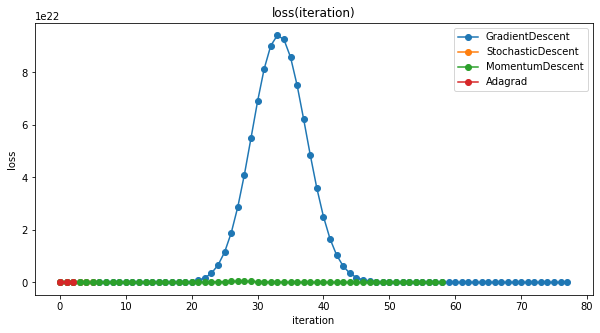

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.xlabel("iteration")
plt.ylabel("loss")
plt.title("loss(iteration)")

for descent in tqdm(descents):
    errors = []
    lambda_ = lambdas[descent.__name__]
    
    X_train, y_train = test.iloc[:, :-1], test.iloc[:, -1]  
    w0 = np.zeros(X_train.shape[1])

    regression = LinearRegression(
        descent = descent(lambda_ = lambda_, w0 = w0),
    )
    regression.fit(X_train.to_numpy(), y_train.to_numpy())

    plt.plot(regression.loss_history, marker='o', label=descent.__name__)

plt.legend()
plt.show()

## Задание 6. Сходимость стохастического градиентного спуска в зависимости от размера батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k) стохастического градиентного спуска на обучающей выборке для каждого размера батча из списка. Замерьте время и количество итераций до сходимости. Посчитайте среднее и дисперсию этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

  0%|          | 0/50 [00:00<?, ?it/s]

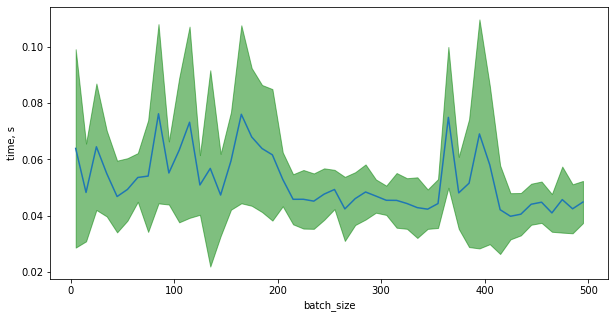

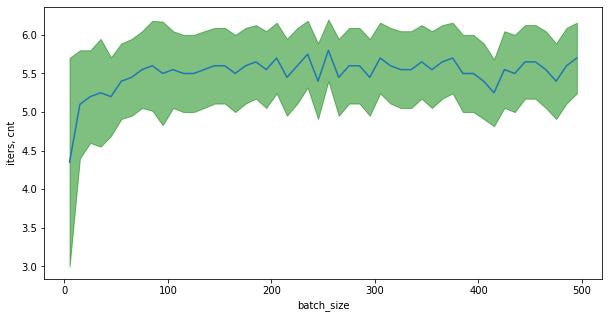

In [26]:
import time

batch_sizes = np.arange(5, 500, 10)

k = 20

time_means = []
time_stds = []

iters_means = []
iters_stds = []

for batch_size in tqdm(batch_sizes):
    lambda_ = lambdas['StochasticDescent']
    X_train, y_train = train.iloc[:, :-1], train.iloc[:, -1]
    
    iters = []
    times = []

    for _ in range(k):
        w0 = np.zeros(X_train.shape[1])

        regression = LinearRegression(
            descent = StochasticDescent(lambda_ = lambda_, w0 = w0, batch_size = batch_size)
        )
        start = time.time()
        regression.fit(X_train.to_numpy(), y_train.to_numpy())
        finish = time.time()
        
        iters_total = len(regression.loss_history)
        
        times.append(finish - start)
        iters.append(iters_total)
        
    time_means.append(np.mean(times))
    time_stds.append(np.std(times))
    
    iters_means.append(np.mean(iters))
    iters_stds.append(np.std(iters))
    
plt.figure(figsize=(10, 5))
plt.xlabel("batch_size")
plt.ylabel("time, s")
plt.plot(batch_sizes, time_means)
plt.fill_between(
    batch_sizes, 
    np.array(time_means) - np.array(time_stds),
    np.array(time_means) + np.array(time_stds), 
    color='g', 
    alpha=0.5
)
plt.show()

plt.figure(figsize=(10, 5))
plt.xlabel("batch_size")
plt.ylabel("iters, cnt")
plt.plot(batch_sizes, iters_means)
plt.fill_between(
    batch_sizes, 
    np.array(iters_means) - np.array(iters_stds),
    np.array(iters_means) + np.array(iters_stds), 
    color='g', 
    alpha=0.5
)
plt.show()

По идее время работы должно улучшаться, но я тут такого не наблюдаю -- что время, что количество итераций примерно не изменяется. Возможно, это потому, что спуск хорошо сходится, в том числе так как я выбрал оптимально подобранные параметры на прошлых шагах.

Возможно, данные плохо обработаны и на них плохо учиться

## Задание 7. Регуляризация (2 балла)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. (Напомним, регуляризация — это добавка к функции потерь, которая штрафует за норму весов). Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите классы **GradientDescentReg**, **StochasticDescentReg**, **MomentumDescentReg**, **AdagradReg** в файле `utils.py`. Мы будем использовать тот же самый класс для линейной регрессии, так как для сравнения методов с регуляризацией и без неё нам нужна только MSE часть функции потерь.

Найдите по валидационной выборке лучшие параметры обучения с регуляризацией. Сравните для каждого метода результаты на тестовой выборке по метрикам MSE и $R^2$ с регуляризацией и без регуляризации. Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации.

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Чем вы можете объяснить это?

In [29]:
all_lambdas = lambdas.copy()
all_lambdas

{'GradientDescent': 0.00018410579366757822,
 'StochasticDescent': 4.5399929762484854e-05,
 'MomentumDescent': 0.00018410579366757822,
 'Adagrad': 0.04076220397836523}

Перебираем по не очень частотной сетке, потому что у меня не тянет компьютер -- даже на таких параметрах ждать очень долго :( 

Такие границы перебора для mu были выбраны из общих соображений + из-за перебора с большим шагом с другими границами

Для лямбды границы:
0,00004539992976 = exp(-10)

0,6065306597 = exp(-.5)

1 = exp(0)

в таком диапазоне разумно ее искать

In [58]:
%autoreload 2

from utils import (
    AdagradReg,
    GradientDescentReg,
    MomentumDescentReg,
    StochasticDescentReg,
)

from tqdm.notebook import tqdm
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

mus = {}
reg_descents = [
    GradientDescentReg,
    StochasticDescentReg,
    MomentumDescentReg,
    AdagradReg,
]

X_train, y_train = train.iloc[:, :-1].to_numpy(), train.iloc[:, -1].to_numpy()
X_validate, y_validate = validate.iloc[:, :-1].to_numpy(), validate.iloc[:, -1].to_numpy()
X_test, y_test = test.iloc[:, :-1].to_numpy(), test.iloc[:, -1].to_numpy()
for descent in tqdm(reg_descents):
    results = []
    for ld in tqdm(np.arange(-10.0, 0.0, 0.5)):
        lmd = np.exp(ld)
        for mu in np.arange(0.0, 1.0, 0.2):
            w0 = np.zeros(X_train.shape[1])
            regression = LinearRegression(
                descent = descent(lambda_ = lmd, w0 = w0, mu=mu),
            )
            regression.fit(X_train, y_train)
            prediction = regression.predict(X_validate)

            try:
                MSE = mean_squared_error(y_validate, prediction)
            except:
                MSE = float('inf')

            total_iters = len(regression.loss_history)
            results.append((MSE, total_iters, lmd, mu))

    MSE, steps, lmd, mu = sorted(results)[0]
    print(f'Optimal λ, μ for {descent.__name__} = {lmd:.7}, {mu}\nSteps until stopping criterion: {steps}')
    all_lambdas[descent.__name__] = lmd
    mus[descent.__name__] = mu
    regression = LinearRegression(
            descent = descent(lambda_ = lmd, w0 = w0, mu=mu),
    )
    regression.fit(X_train, y_train)
    prediction = regression.predict(X_test)
    MSE = mean_squared_error(y_test, prediction)
    R2 = r2_score(y_test, prediction)
    print(f'Test errors are:\nMSE: {MSE}\nR^2: {R2}\n')

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Optimal λ, μ for GradientDescentReg = 0.0002034684, 0.2
Steps until stopping criterion: 97
Test errors are:
MSE: 2.2639356205536165
R^2: -0.6405152906656044



  0%|          | 0/20 [00:00<?, ?it/s]

Optimal λ, μ for StochasticDescentReg = 4.539993e-05, 0.2
Steps until stopping criterion: 11
Test errors are:
MSE: 24.667443519632616
R^2: -16.874765478398064



  0%|          | 0/20 [00:00<?, ?it/s]

Optimal λ, μ for MomentumDescentReg = 7.485183e-05, 0.0
Steps until stopping criterion: 10
Test errors are:
MSE: 5.00604137817772
R^2: -2.6275269279066364



  0%|          | 0/20 [00:00<?, ?it/s]

Optimal λ, μ for AdagradReg = 0.04978707, 0.0
Steps until stopping criterion: 3
Test errors are:
MSE: 4.069757654451011
R^2: -1.9490678095332128



In [59]:
all_lambdas

{'GradientDescent': 0.00018410579366757822,
 'StochasticDescent': 4.5399929762484854e-05,
 'MomentumDescent': 0.00018410579366757822,
 'Adagrad': 0.04076220397836523,
 'GradientDescentReg': 0.00020346836901064417,
 'StochasticDescentReg': 4.5399929762484854e-05,
 'MomentumDescentReg': 7.48518298877006e-05,
 'AdagradReg': 0.049787068367863944}

In [60]:
mus

{'GradientDescentReg': 0.2,
 'StochasticDescentReg': 0.2,
 'MomentumDescentReg': 0.0,
 'AdagradReg': 0.0}

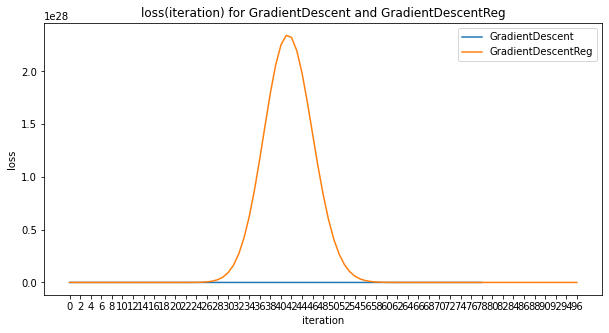

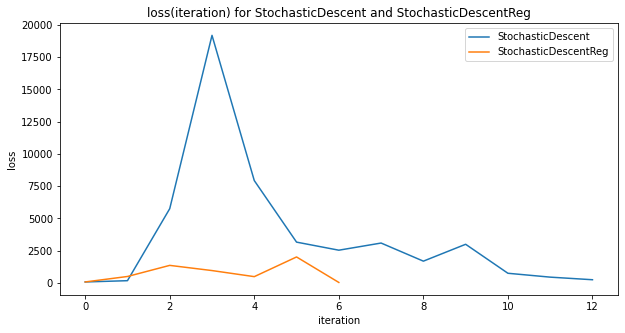

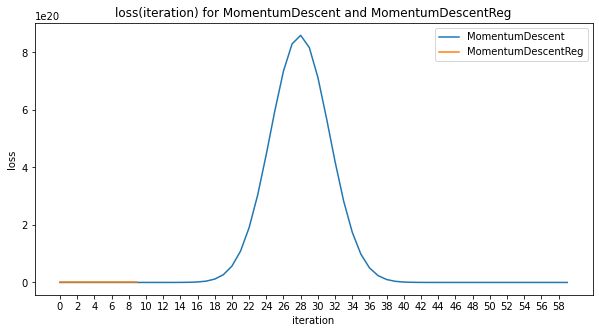

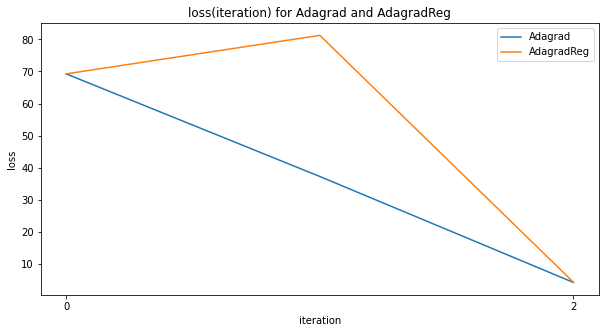

In [67]:
descent_pairs = [
    (GradientDescentReg, GradientDescent),
    (StochasticDescentReg, StochasticDescent),
    (MomentumDescentReg, MomentumDescent),
    (AdagradReg, Adagrad),
]

X_train, y_train = train.iloc[:, :-1].to_numpy(), train.iloc[:, -1].to_numpy()
    
for reg_descent, descent in descent_pairs:
    reg_lmd, lmd = all_lambdas[reg_descent.__name__], all_lambdas[descent.__name__]

    w0 = np.zeros(X_train.shape[1])
    regression = LinearRegression(
            descent = descent(lambda_ = lmd, w0 = w0),
    )
    regression.fit(X_train, y_train)
             
    w0 = np.zeros(X_train.shape[1])
    reg_regression = LinearRegression(
            descent = reg_descent(lambda_ = reg_lmd, w0 = w0, mu=mus[reg_descent.__name__]),
    )
    reg_regression.fit(X_train, y_train)

    plt.figure(figsize=(10, 5))
    plt.xlabel("iteration")
    plt.ylabel("loss")
    plt.title(f"loss(iteration) for {descent.__name__} and {reg_descent.__name__}")
    plt.xticks(list(range(max(len(regression.loss_history), len(reg_regression.loss_history))))[0::2])
    plt.plot(regression.loss_history, label=descent.__name__)
    plt.plot(reg_regression.loss_history, label=reg_descent.__name__)
    plt.legend()
    plt.show()

Видно, что mu можно подбирать еще меньше -- прямо в районе 0.01 - 0.2, перебирая по десятым или опять по лог сетке. Но для меня это очень долго, поэтому я остановлюсь на таком значении -- видно, что где-то регуляризация помогает, например, в стохастическом спуске -- там число итераций изменяется.

Еще понятно, что, допустим, в Ada не может быть хуже результат в версии с регуляризатором (потому что всегда можно просто взять мю = 0), такой график получается из-за большей сетки (опять же, не смог запустить на большем количестве значений)

В общем и целом особого влияния на сходимость я не наблюдаю, разве что где-то спуск сходится быстрее

Можно построить еще графики, на котором спуски с регуляризатором строятся с теми же лямбдами, что и обычные спуски:
    

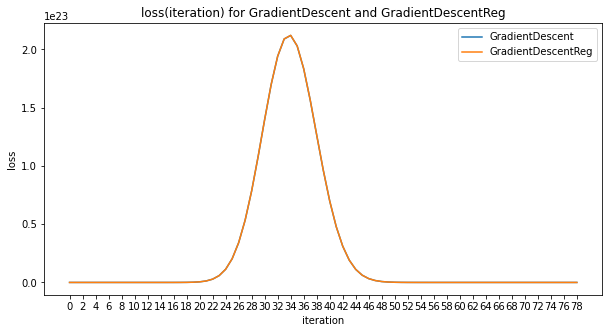

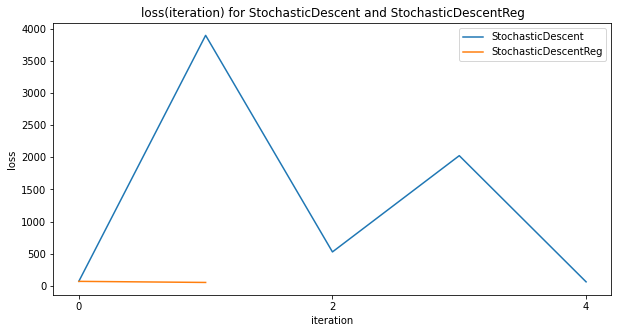

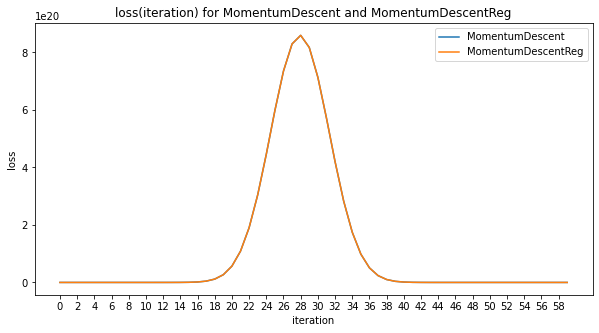

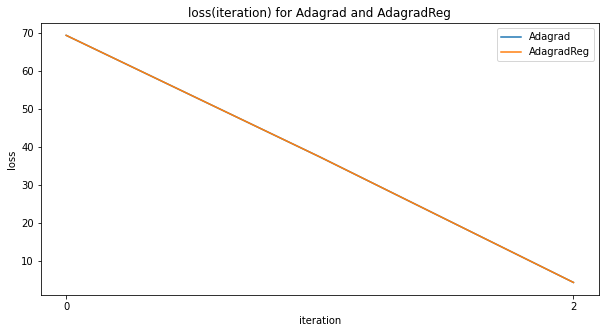

In [66]:
for reg_descent, descent in descent_pairs:
    reg_lmd, lmd = all_lambdas[reg_descent.__name__], all_lambdas[descent.__name__]

    w0 = np.zeros(X_train.shape[1])
    regression = LinearRegression(
            descent = descent(lambda_ = lmd, w0 = w0),
    )
    regression.fit(X_train, y_train)
             
    w0 = np.zeros(X_train.shape[1])
    reg_regression = LinearRegression(
            descent = reg_descent(lambda_ = lmd, w0 = w0, mu=mus[reg_descent.__name__]),
    )
    reg_regression.fit(X_train, y_train)

    plt.figure(figsize=(10, 5))
    plt.xlabel("iteration")
    plt.ylabel("loss")
    plt.title(f"loss(iteration) for {descent.__name__} and {reg_descent.__name__}")
    plt.xticks(list(range(max(len(regression.loss_history), len(reg_regression.loss_history))))[0::2])
    plt.plot(regression.loss_history, label=descent.__name__)
    plt.plot(reg_regression.loss_history, label=reg_descent.__name__)
    plt.legend()
    plt.show()